# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [48]:
# Load pickled data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [49]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
test = np.unique(y_test)
train = np.unique(y_train)
all = test.tolist() + train.tolist()
n_classes = len(np.unique(np.array(all)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

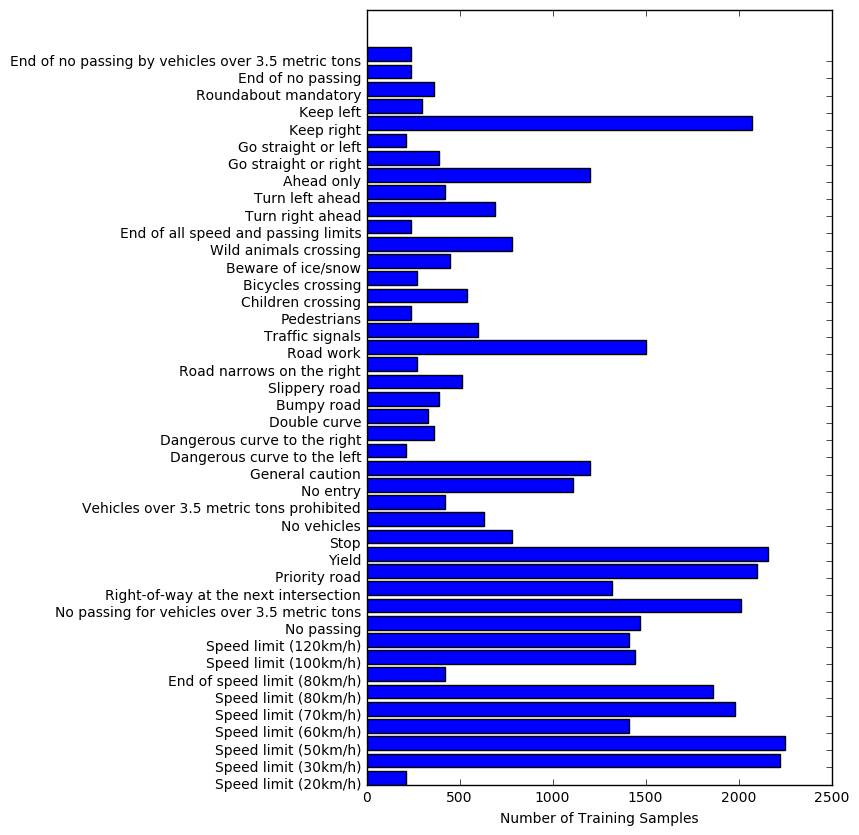

In [50]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# plot a histogram showing the number of samples for each sign type
sign_types = pd.read_csv('signnames.csv')
plt.figure(figsize=(6,10))
plt.barh(sign_types.ClassId, np.bincount(y_train))
plt.yticks(sign_types.ClassId, sign_types.SignName)
plt.xlabel('Number of Training Samples')
plt.show()

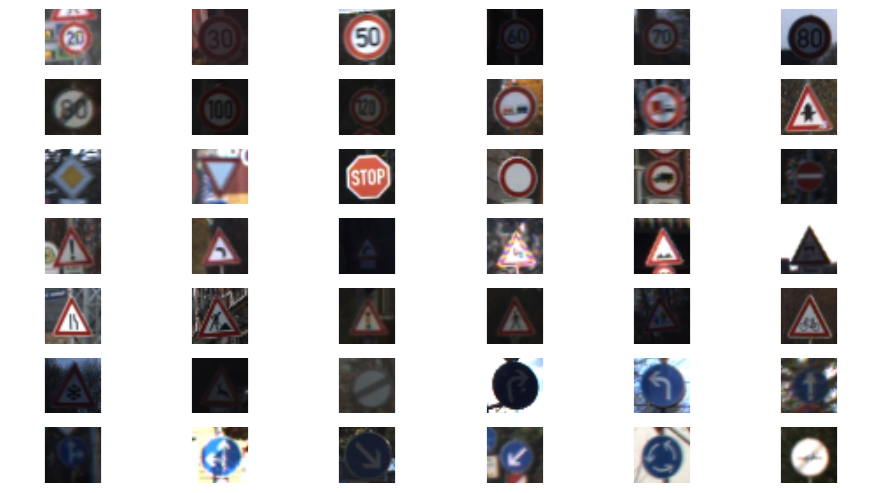

In [51]:
# display a randomly chosen image of each sign type 
# for a quick visual examination of the dataset

rows = 7
cols = 6
f, ax = plt.subplots(rows, cols, sharex='col', sharey='row', figsize=(9,5))
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.subplots_adjust(wspace=None, hspace=None)

for i in range(42):
    signs = np.where(y_train == i)[0]
    index = np.random.choice(len(signs), 1)[0]
    train_row = signs[index]
    sample = X_train[train_row]
    
    # https://en.wikipedia.org/wiki/Grayscale
    Y = 0.2126 * sample[:,:,0] + 0.7152 * sample[:,:,1] + 0.0722 * sample[:,:,2]

    row = int(i/cols)
    col = i % cols
    axis = ax[row, col]
     
    label = sign_types[sign_types.ClassId == y_train[train_row]].SignName.tolist()[0]

    axis.set_axis_off()
    axis.tick_params(
        axis='both',
        which='both',
        bottom='off',
        left='off',
        top='off',
        labelbottom='off',
        labelleft='off')
    #axis.set_title(label) # messes up image rendering
    axis.imshow(sample)
        
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [52]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Preprocess the data here.
### Feel free to use as many code cells as needed.

# https://en.wikipedia.org/wiki/Grayscale
# X_train[:, :, :, 0] = 0.2126 * X_train[:, :, :, 0]
# X_train[:, :, :, 1] = 0.7152 * X_train[:, :, :, 1]
# X_train[:, :, :, 2] = 0.0722 * X_train[:, :, :, 2]

# normalization as described in http://ijssst.info/Vol-15/No-2/data/3251a024.pdf
# X_train = X_train / 255

def normalize(arr):
    arr=arr.astype('float32')
    if arr.max() > 1.0:
        arr = (arr - 128.0)/ 128.0
    return arr

In [53]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)

X_train = normalize(X_train)
X_test  = normalize(X_test)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=.75)

print(X_train.shape)

(29406, 32, 32, 3)


In [54]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1
    
def convolution(x, weight_shape, bias_length, activation=tf.nn.relu):    
    weights = tf.Variable(tf.truncated_normal(shape=weight_shape, mean=mu, stddev=sigma))
    bias = tf.Variable(tf.zeros(bias_length))
    tf.summary.histogram("convolution_weights", weights)
    tf.summary.histogram("convolution_bias", bias)
    conv = tf.nn.conv2d(x, weights, strides = [1,1,1,1], padding='VALID') + bias
    conv = activation(conv)
    return tf.nn.max_pool(conv, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

def connected(x, weight_shape, bias_length):
    weights = tf.Variable(tf.truncated_normal(shape=weight_shape, mean=mu, stddev=sigma))
    bias = tf.Variable(tf.zeros(bias_length))
    tf.summary.histogram("connected_weights", weights)
    tf.summary.histogram("connected_bias", bias)
    return tf.matmul(x, weights) + bias
    
def network(x):    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    convolved = convolution(x, (5,5,3,6), 6)

    # Layer 2: Convolutional. Output = 10x10x16.
    convolved = convolution(convolved, (5, 5, 6, 16), 16, tf.nn.tanh)

    # Flatten. Input = 5x5x16. Output = 400.
    flattened = flatten(convolved)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fully_connected = tf.nn.relu(connected(flattened, (400,120), 120))

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fully_connected = tf.nn.relu(connected(fully_connected, (120, 84), 84))

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = connected(fully_connected, (84, 43), 43)
    tf.summary.histogram("output", logits)
    return logits

In [55]:
def loss(logits, y):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y)
    return tf.reduce_mean(cross_entropy)
    
def training(loss, global_step):
    tf.summary.scalar("cost", loss)
    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
    return optimizer.minimize(loss, global_step=global_step)

def accuracy(logits, y):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy_rate = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("validation_error", (1.0 - accuracy_rate))
    return accuracy_rate

def evaluate(session, X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        accuracy = session.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [57]:
### Train your model here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

EPOCHS = 50
BATCH_SIZE = 128


with tf.Graph().as_default():
    
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    global_step = tf.Variable(0, name='global_step', trainable=False)

    logits = network(x)

    one_hot = tf.one_hot(y, 43)

    cost = loss(logits, one_hot)    

    train_operation = training(cost, global_step)

    accuracy_operation = accuracy(logits, one_hot)

    summary_op = tf.summary.merge_all()
    
    sess = tf.InteractiveSession()

    saver = tf.train.Saver()

    summary_writer = tf.summary.FileWriter("tensor_logs/", graph=sess.graph)

    sess.run(tf.global_variables_initializer())

    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(train_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(sess, X_validation, y_validation, BATCH_SIZE)

        summary_str = sess.run(summary_op, feed_dict={x: batch_x, y: batch_y})
        summary_writer.add_summary(summary_str, sess.run(global_step))

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, 'network')
    print("Model saved")
    print()

Training...

EPOCH 1 ...
Validation Accuracy = 0.833

EPOCH 2 ...
Validation Accuracy = 0.932

EPOCH 3 ...
Validation Accuracy = 0.956

EPOCH 4 ...
Validation Accuracy = 0.966

EPOCH 5 ...
Validation Accuracy = 0.971

EPOCH 6 ...
Validation Accuracy = 0.973

EPOCH 7 ...
Validation Accuracy = 0.978

EPOCH 8 ...
Validation Accuracy = 0.974

EPOCH 9 ...
Validation Accuracy = 0.979

EPOCH 10 ...
Validation Accuracy = 0.981

EPOCH 11 ...
Validation Accuracy = 0.977

EPOCH 12 ...
Validation Accuracy = 0.981

EPOCH 13 ...
Validation Accuracy = 0.979

EPOCH 14 ...
Validation Accuracy = 0.983

EPOCH 15 ...
Validation Accuracy = 0.982

EPOCH 16 ...
Validation Accuracy = 0.974

EPOCH 17 ...
Validation Accuracy = 0.983

EPOCH 18 ...
Validation Accuracy = 0.985

EPOCH 19 ...
Validation Accuracy = 0.982

EPOCH 20 ...
Validation Accuracy = 0.986

EPOCH 21 ...
Validation Accuracy = 0.983

EPOCH 22 ...
Validation Accuracy = 0.969

EPOCH 23 ...
Validation Accuracy = 0.975

EPOCH 24 ...
Validation Accura

In [58]:
### Evaluate the model on the test data
saver.restore(sess, tf.train.latest_checkpoint('.'))
test_accuracy = evaluate(sess, X_test, y_test, BATCH_SIZE)
print("Test Accuracy = {:.3f}".format(test_accuracy))
print()

Test Accuracy = 0.931



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I tried a couple of different techniques described in the academic literature cited above, ultimately finding that the best preprocessing technique, as far as training accuracy was concerned, was to center the data with a mean of zero and scale it to plus or minus 1. Just prior to normalization the training data was shuffled.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The data as downloaded was previously split into a training and test set. A validation set was taken from the training data using scikit-learn's `train_test_split` functionality, with 25% set aside for validation.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The final architecture is modeled very closely on the LeNet network we studied in the labs. We use two convolutional layers followed by three fully connected layers. ReLu activation is used throughout, except for the second convolutional layer, which uses tanh, as this seemed to yield better accuracy in training. The architecture is diagrammed below:

![title](img/arch1.png)
![title](img/arch2.png)
![title](img/arch3.png)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Training was done in batches of 128, with finally 50 epochs used. I trained as many as 300 epochs but the maximum validation accuracy on the training data was 99.1%, so in the end, in the interest of time, I just used 50 epochs, which gave essentially the same accuracy on the training data. (Perhaps the accuracy on the test set might have been higher with greater epochs of training. A `MomentumOptimizer` was tested, but the `AdamOptimizer` performed better, and seems to be the preferred optimization method of the community. The standard 0.001 learning rate was used. graphs of the cost and validation error are shown below:

![title](img/cost.png)
![title](img/error.png)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started with the solution we worked through in the LeNet lab, and then tried fiddling with hyperparameters, activation functions, adding layers, etc. It was very much trial and error, as I needed to work through the labs plus read several books outside of the Coursera content to gain enough understanding. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

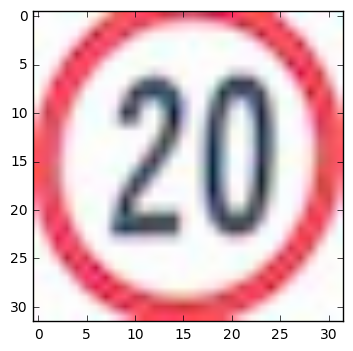

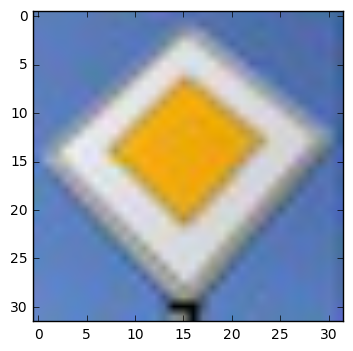

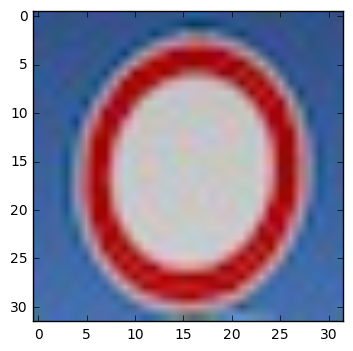

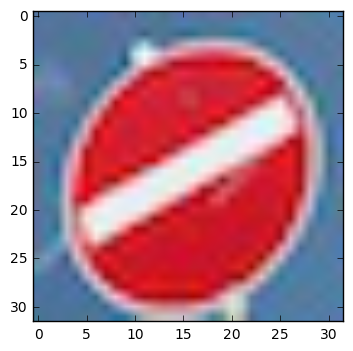

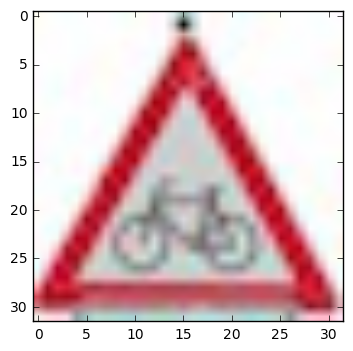

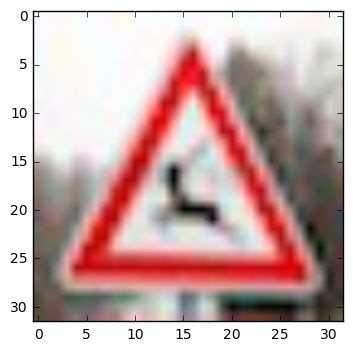

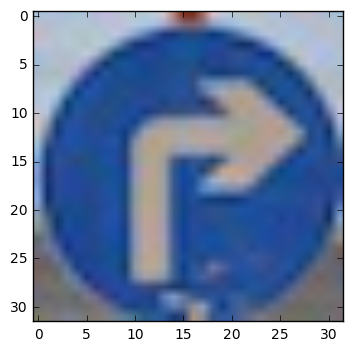

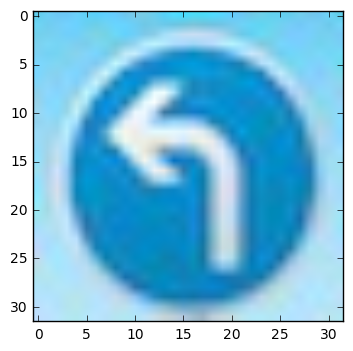

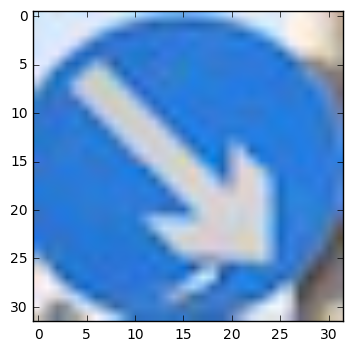

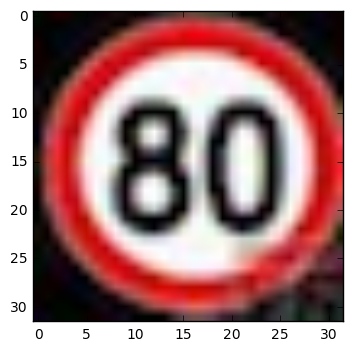

In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

dir = "new_images/"
images = os.listdir(dir)
for img in images:
    bits = mpimg.imread(dir + img)
    plt.imshow(bits)
    plt.show()

In [67]:
print("Test accuracy on new images from the web")
dir = "new_images/"
images = os.listdir(dir)

X_novel = np.zeros((len(images), 32, 32, 3))
y_novel = np.zeros(len(images))

for (index, img) in enumerate(images):
    bits = mpimg.imread(dir + img)
    X_novel[index] = bits
    y_novel[index] = img[:-4]

X_novel = normalize(X_novel)

X_candidate = np.zeros((1, 32, 32, 3))
y_candidate = np.zeros((1))        

for (index, img) in enumerate(X_novel):
    X_candidate[0] = img
    y_candidate[0] = y_novel[index]

    accuracy = sess.run(accuracy_operation, feed_dict={x: X_candidate, y: y_candidate})
    print("Label: ", y_novel[index], " accuracy: ", "{:.0f}".format(accuracy))  

Test accuracy on new images from the web
Label:  0.0  accuracy:  0
Label:  12.0  accuracy:  1
Label:  15.0  accuracy:  1
Label:  17.0  accuracy:  0
Label:  29.0  accuracy:  1
Label:  31.0  accuracy:  1
Label:  33.0  accuracy:  1
Label:  34.0  accuracy:  1
Label:  38.0  accuracy:  1
Label:  5.0  accuracy:  0


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The images taken from the web were in fact German traffic signs, but they may not have been curated the same way as the images in the provided training dataset. For instance, some of them were at slight angles, with the actual sign distorted in shape. Also, they were fairly larger than the required 32x32 size, and were simply scaled down in an image editing program. It's unclear if that contributed to the decreased accuracy on these images.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
As expected, the model was not able to achieve the same performance on novel images as that which was achieved on the especially the training data, but also even the test data. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:**
The softmax probabilities indicate that the model yields quite a high degree of uncertainty on new images. 

In [74]:
for (index, img) in enumerate(X_novel):
    X_candidate[0] = img
    y_candidate[0] = y_novel[index]

    probs = sess.run(logits, feed_dict={x: X_candidate, y: y_candidate})
    op = tf.nn.top_k(probs, k=5)
    topK = sess.run(op) 
    print("True class ID: ", int(y_novel[index]))
    print("Top 5 Probability", topK.values)
    print("Top 5 Labels", topK.indices)


Real label:  0
Probabilities [[ 6.57725906  5.84344959  3.03329086   2.8982234    2.2997973 ]]
Label by probabilities [[5 2 3 7 1]]

Real label:  12
Probabilities [[ 24.7037487    3.82905078   0.15040894  -3.24819636  -7.33180189]]
Label by probabilities [[12  5 31 29  1]]

Real label:  15
Probabilities [[ 13.84515572   8.00038147   6.83998632   6.0478282    2.90672874]]
Label by probabilities [[15  9 15  3  5]]

Real label:  17
Probabilities [[ 8.34224701  6.87692451  6.68454361   2.02259493   1.24440932]]
Label by probabilities [[1 15 22  9  3]]

Real label:  29
Probabilities [[ 11.37319279   5.49786472   3.87814379   2.89081693  -0.01287952]]
Label by probabilities [[29 2 7 1 8]]

Real label:  31
Probabilities [[ 38.52631569  16.63459587  6.28991303 4.41908789 2.74784803]]
Label by probabilities [[31 32 37  0  1]]

Real label:  33
Probabilities [[ 18.26891327  13.26260376  11.4836483   10.0070219    9.88691807]]
Label by probabilities [[33 21 24 23 27]]

Real label:  34
Probabiliti

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.